### Best Subset Selection

In [2]:
library(ISLR)
names(Hitters)

[1] "AtBat"     "Hits"      "HmRun"     "Runs"      "RBI"       "Walks"    
 [7] "Years"     "CAtBat"    "CHits"     "CHmRun"    "CRuns"     "CRBI"     
[13] "CWalks"    "League"    "Division"  "PutOuts"   "Assists"   "Errors"   
[19] "Salary"    "NewLeague"

In [6]:
dim(Hitters)
#delete rows with missing data
Hitters=na.omit(Hitters)
dim(Hitters)

[1] 263  20

[1] 263  20

In [7]:
# we can perform best subset selection through regsubsets()
# this is part of leaps library
library(leaps)

In [8]:
regfit.full = regsubsets(Salary~.,Hitters)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., Hitters)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 ) " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 ) " "   "*"  " "   " "  " " " "   

At each degree of polynomial, wecan see which ones factors are significant (i.e. they are included in the model.) By default, we only return 8 most significant variables--we can change it by the following:

In [12]:
regfit.full=regsubsets(Salary~.,data=Hitters, nvmax=19)
summary(regfit.full)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19)
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: exhaustive
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2  ( 1 )  " "   "*"

Now in our 19 degree polynomial, we end up using all of the variables.

In [14]:
# We can see the values for RSS, adjR2, BIC
names(summary(regfit.full))

[1] "which"  "rsq"    "rss"    "adjr2"  "cp"     "bic"    "outmat" "obj"

In [39]:
# prints out p x p matrix that tells you which variables you end up using.
# summary(regfit.full)$which

# prints out the r-squared values for each 19 models
# summary(regfit.full)$rsq #r squared

# can do the same with rss, R^2, C_p, bic

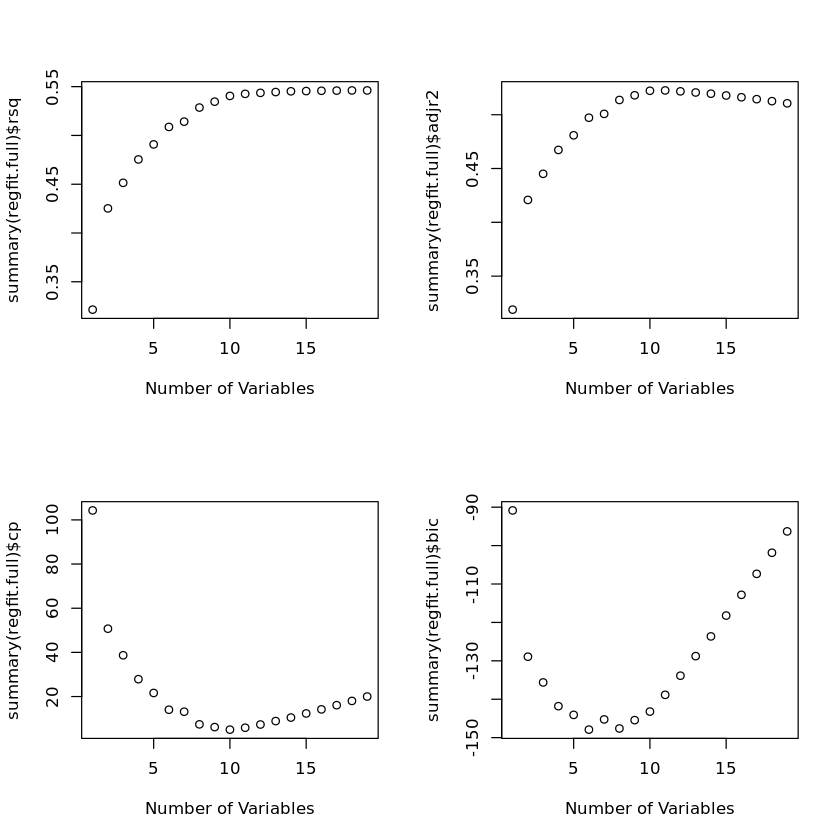

In [53]:
par(mfrow = c(2,2))
plot(summary(regfit.full)$rsq, xlab="Number of Variables") # want the max
plot(summary(regfit.full)$adjr2, xlab="Number of Variables") #want the max
plot(summary(regfit.full)$cp, xlab="Number of Variables") # want the min
plot(summary(regfit.full)$bic, xlab="Number of Variables") #want the min

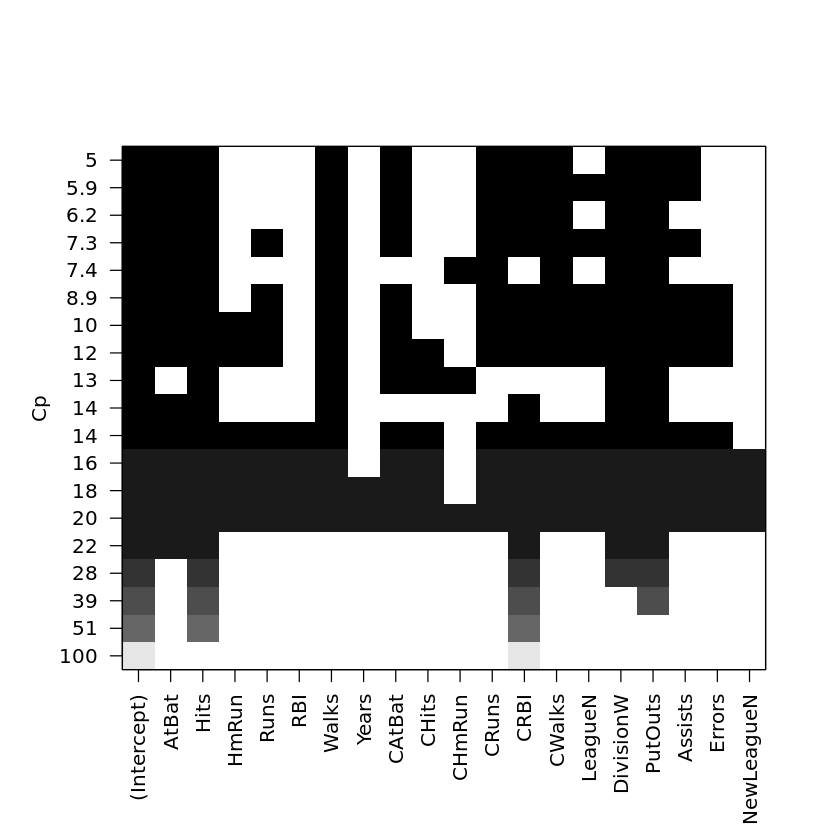

In [58]:
# par(mfrow=c(2,2))

# Displays what which 
# plot(regfit.full, scale="r2")
# plot(regfit.full, scale="adjr2")
plot(regfit.full, scale="Cp")
# plot(regfit.full, scale="bic")

In [60]:
coef(regfit.full, 19)

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 163.1035878   -1.9798729    7.5007675    4.3308829   -2.3762100   -1.0449620 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   6.2312863   -3.4890543   -0.1713405    0.1339910   -0.1728611    1.4543049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.8077088   -0.8115709   62.5994230 -116.8492456    0.2818925    0.3710692 
      Errors   NewLeagueN 
  -3.3607605  -24.7623251

### Forward and Backward Stepwise Selection

In [62]:
regfit.fwd=regsubsets(Salary~.,data=Hitters,nvmax=19, method="forward")
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "forward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: forward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    " "   "*" 
2 

In [63]:
regfit.bwd=regsubsets(Salary~.,data=Hitters, nvmax=19, method="backward")
summary(regfit.bwd)

Subset selection object
Call: regsubsets.formula(Salary ~ ., data = Hitters, nvmax = 19, method = "backward")
19 Variables  (and intercept)
           Forced in Forced out
AtBat          FALSE      FALSE
Hits           FALSE      FALSE
HmRun          FALSE      FALSE
Runs           FALSE      FALSE
RBI            FALSE      FALSE
Walks          FALSE      FALSE
Years          FALSE      FALSE
CAtBat         FALSE      FALSE
CHits          FALSE      FALSE
CHmRun         FALSE      FALSE
CRuns          FALSE      FALSE
CRBI           FALSE      FALSE
CWalks         FALSE      FALSE
LeagueN        FALSE      FALSE
DivisionW      FALSE      FALSE
PutOuts        FALSE      FALSE
Assists        FALSE      FALSE
Errors         FALSE      FALSE
NewLeagueN     FALSE      FALSE
1 subsets of each size up to 19
Selection Algorithm: backward
          AtBat Hits HmRun Runs RBI Walks Years CAtBat CHits CHmRun CRuns CRBI
1  ( 1 )  " "   " "  " "   " "  " " " "   " "   " "    " "   " "    "*"   " " 


In [65]:
coef(regfit.full,19)
coef(regfit.fwd, 19)
coef(regfit.bwd, 19)

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 163.1035878   -1.9798729    7.5007675    4.3308829   -2.3762100   -1.0449620 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   6.2312863   -3.4890543   -0.1713405    0.1339910   -0.1728611    1.4543049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.8077088   -0.8115709   62.5994230 -116.8492456    0.2818925    0.3710692 
      Errors   NewLeagueN 
  -3.3607605  -24.7623251

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 163.1035878   -1.9798729    7.5007675    4.3308829   -2.3762100   -1.0449620 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   6.2312863   -3.4890543   -0.1713405    0.1339910   -0.1728611    1.4543049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.8077088   -0.8115709   62.5994230 -116.8492456    0.2818925    0.3710692 
      Errors   NewLeagueN 
  -3.3607605  -24.7623251

(Intercept)        AtBat         Hits        HmRun         Runs          RBI 
 163.1035878   -1.9798729    7.5007675    4.3308829   -2.3762100   -1.0449620 
       Walks        Years       CAtBat        CHits       CHmRun        CRuns 
   6.2312863   -3.4890543   -0.1713405    0.1339910   -0.1728611    1.4543049 
        CRBI       CWalks      LeagueN    DivisionW      PutOuts      Assists 
   0.8077088   -0.8115709   62.5994230 -116.8492456    0.2818925    0.3710692 
      Errors   NewLeagueN 
  -3.3607605  -24.7623251

In [68]:
set.seed(1)
train=sample(c(TRUE,FALSE), nrow(Hitters), rep=TRUE)
test=(!train)

In [80]:
#we have to do this because there is no predict() method for regsubsets()
regfit.best=regsubsets(Salary~.,data=Hitters[train,],nvmax=19)
test.mat=model.matrix(Salary~.,data=Hitters[test,])
val.errors=rep(NA,19)
for (i in 1:19) {
    coefi = coef(regfit.best, id=i)
    pred=test.mat[,names(coefi)]%*%coefi
    val.errors[i]=mean((Hitters$Salary[test]-pred)^2)
}
val.errors
which.min(val.errors)
coef(regfit.best,10)

[1] 220968.0 169157.1 178518.2 163426.1 168418.1 171270.6 162377.1 157909.3
 [9] 154055.7 148162.1 151156.4 151742.5 152214.5 157358.7 158541.4 158743.3
[17] 159972.7 159859.8 160105.6

[1] 10

(Intercept)       AtBat        Hits       Walks      CAtBat       CHits 
-80.2751499  -1.4683816   7.1625314   3.6430345  -0.1855698   1.1053238 
     CHmRun      CWalks     LeagueN   DivisionW     PutOuts 
  1.3844863  -0.7483170  84.5576103 -53.0289658   0.2381662